In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("data/CLF Embodied Carbon Benchmark Research 17.01.31.csv")

In [3]:
df.head()

,BLDG_PUBID,BLDG_TYP,BLDG_US,BLDG_LOC_REGION,BLDG_NEW_REN,$BLDG_AREA_M2,$BLDG_AREA_FT2,BLDG_STOR_A,$BLDG_STOR_A,LCA_YEAR,...,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40
0,A00,Commercial,Mixed use,Middle East,New,46452 to 92903,"500,001 to 1 million",0.0,More than 25,2016.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,A00,Commercial,Other,North America,New,46452 to 92903,"500,001 to 1 million",0.0,7 to 14,2016.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,A00,Commercial,Office,Europe,New,46452 to 92903,"500,001 to 1 million",0.0,More than 25,2016.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,A00,Commercial,Other,North America,New,930 to 2323,"10,001 to 25,000",0.0,1 to 6,2016.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,A00,Commercial,Office,Asia-Pacific,New,Over 92903,Over 1 million,0.0,15 to 25,2016.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Change 'Commercial ' to 'Commercial' , 'Residential ' to 'Residential'
df.loc[(df.BLDG_TYP == 'Commercial '), 'BLDG_TYP'] = 'Commercial'
df.loc[(df.BLDG_TYP == 'Residential '), 'BLDG_TYP'] = 'Residential'

# Drop nan in BLDG_TYP column

df = df.dropna(subset=['EC_LCAA_PERM2'])

df = df.drop(['Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20','Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24','Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27', 'Unnamed: 28',
         'Unnamed: 29', 'Unnamed: 30', 'Unnamed: 31', 'Unnamed: 32','Unnamed: 33', 'Unnamed: 34', 'Unnamed: 35', 'Unnamed: 36', 'Unnamed: 37', 'Unnamed: 38', 'Unnamed: 39', 'Unnamed: 40'], axis=1)
df

,BLDG_PUBID,BLDG_TYP,BLDG_US,BLDG_LOC_REGION,BLDG_NEW_REN,$BLDG_AREA_M2,$BLDG_AREA_FT2,BLDG_STOR_A,$BLDG_STOR_A,LCA_YEAR,LCA_REFPERIOD,LCA_SOUR_CODE,LCA_STAGES,LCA_BLDG_SCOPE,LCA_MAT_Q,EC_WB_EX_OPER,EC_LCAA_PERM2
0,A00,Commercial,Mixed use,Middle East,New,46452 to 92903,"500,001 to 1 million",0.0,More than 25,2016.0,40.0,41.0,AB,SF,Y,2567.39,2521.63
1,A00,Commercial,Other,North America,New,46452 to 92903,"500,001 to 1 million",0.0,7 to 14,2016.0,40.0,41.0,AB,SF,Y,1699.34,1332.55
2,A00,Commercial,Office,Europe,New,46452 to 92903,"500,001 to 1 million",0.0,More than 25,2016.0,40.0,41.0,AB,SF,Y,1303.39,1031.76
3,A00,Commercial,Other,North America,New,930 to 2323,"10,001 to 25,000",0.0,1 to 6,2016.0,40.0,41.0,AB,SF,Y,1211.33,938.69
4,A00,Commercial,Office,Asia-Pacific,New,Over 92903,Over 1 million,0.0,15 to 25,2016.0,40.0,41.0,AB,SF,Y,1087.86,937.59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1116,A05,Residential,Single-family,Europe,New,93 or less,"1,000 or less",0.0,1 to 6,2012.0,50.0,NaN,ABCD,SFEI,Y,8.80,179.03
1117,A05,Residential,Single-family,Europe,New,94 to 465,"1,001 to 5,000",0.0,1 to 6,2012.0,50.0,NaN,AB,NaN,NaN,32.64,170.00
1118,A05,Residential,Single-family,Asia-Pacific,New,93 or less,"1,000 or less",0.0,1 to 6,2011.0,NaN,NaN,NaN,NaN,Y,8782.80,168.90
1179,A05,Residential,Single-family,North America,New,94 to 465,"1,001 to 5,000",0.0,1 to 6,1998.0,50.0,NaN,ABC,SFEI,Y,NaN,185.89


Text(0, 0.5, 'Initial Embodied Carbon (kg-CO₂e/m²)')

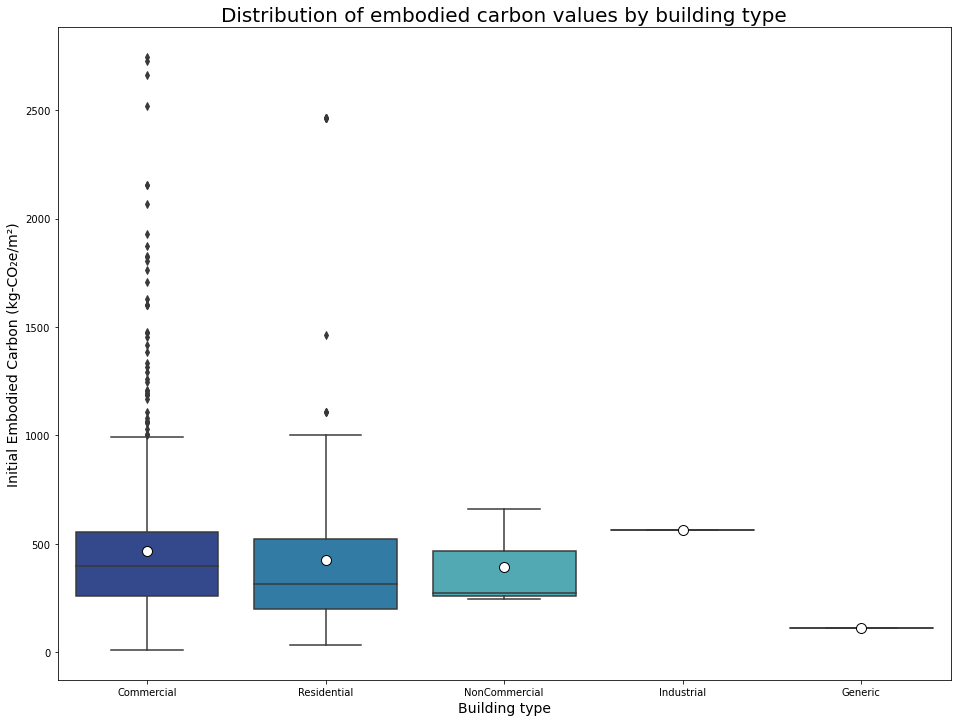

In [5]:
df_BLDG_TYP = df.copy()
df_BLDG_TYP = df.dropna(subset=['BLDG_TYP'])

fig, ax = plt.subplots(figsize=(16,12))

sns.boxplot(x = df_BLDG_TYP['BLDG_TYP'], y = df_BLDG_TYP['EC_LCAA_PERM2'], palette='YlGnBu_r', order=['Commercial', 'Residential', 'NonCommercial', 'Industrial', 'Generic'],
            showmeans=True, meanprops={"marker":"o", "markerfacecolor":"white", "markeredgecolor":"black", "markersize":"10"})

plt.title("Distribution of embodied carbon values by building type", fontsize=20)
plt.xlabel("Building type", fontsize = 14)
plt.ylabel("Initial Embodied Carbon (kg-CO₂e/m²)", fontsize = 14)

In [6]:
df_BLDG_US = df.copy()
df_BLDG_US = df.dropna(subset=['BLDG_US'])

mean = df_BLDG_US['EC_LCAA_PERM2'].groupby(df_BLDG_US['BLDG_US']).mean().sort_values(ascending=False)
mean.index

Index(['Mixed use', 'Multi-family', 'Public Order and Safety', 'Industrial',
       'Public Assembly', 'Health Care', 'Mixed', 'Other ', 'Education',
       'Mercantile', 'Other', 'Office', 'Warehouse', 'Lodging',
       'Single-family', 'Parking'],
      dtype='object', name='BLDG_US')

Text(0, 0.5, 'Initial Embodied Carbon (kg-CO₂e/m²)')

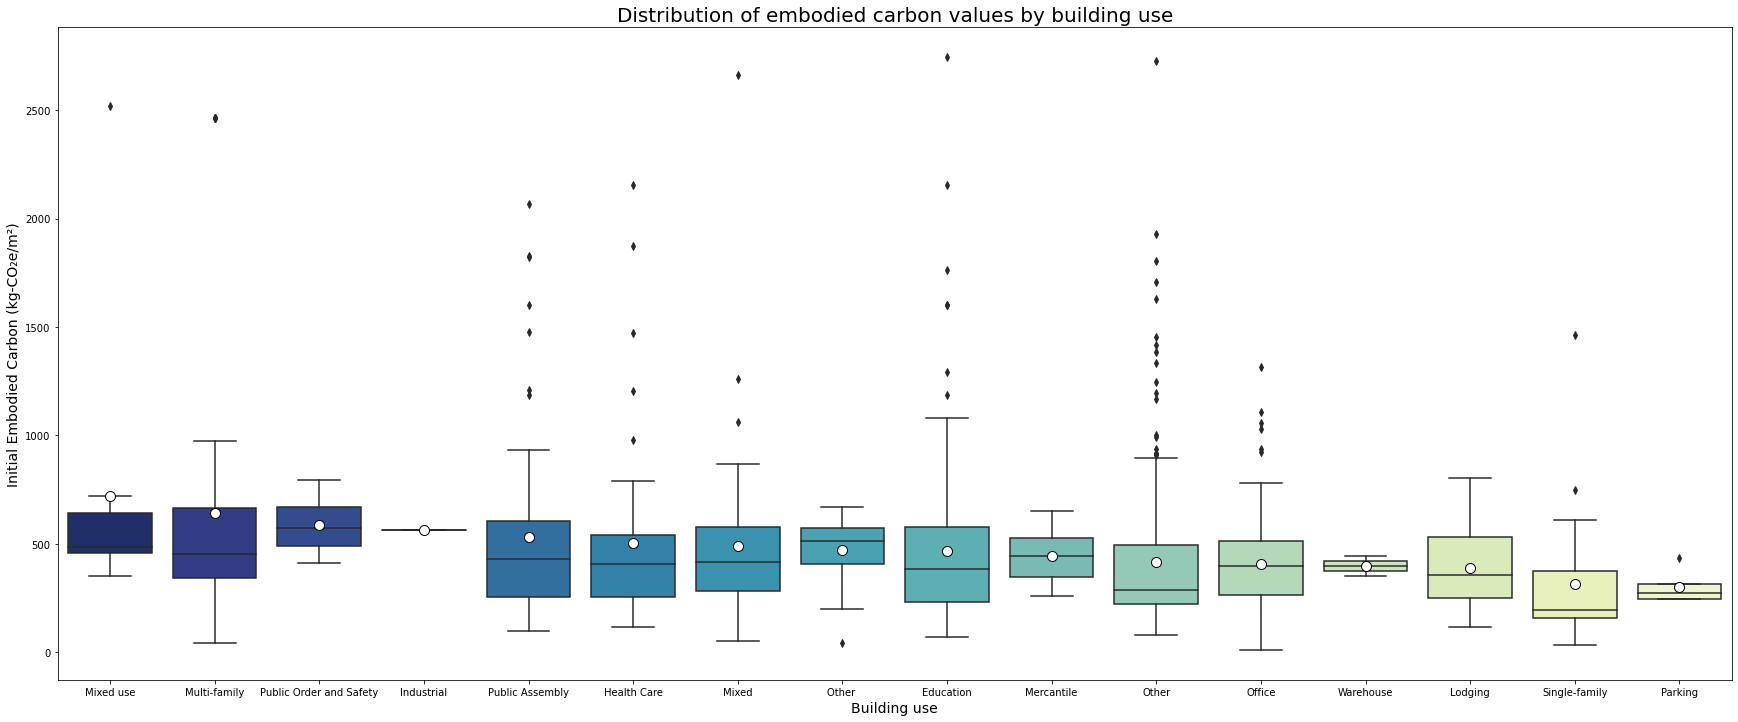

In [7]:
fig, ax = plt.subplots(figsize=(30,12))

sns.boxplot(x = df_BLDG_US['BLDG_US'], y = df_BLDG_US['EC_LCAA_PERM2'], palette='YlGnBu_r', order = mean.index,
            showmeans=True, meanprops={"marker":"o", "markerfacecolor":"white", "markeredgecolor":"black", "markersize":"10"})

plt.title("Distribution of embodied carbon values by building use", fontsize=20)
plt.xlabel("Building use", fontsize = 14)
plt.ylabel("Initial Embodied Carbon (kg-CO₂e/m²)", fontsize = 14)

In [8]:
df_BLDG_LOC_REGION = df.copy()
df_BLDG_LOC_REGION = df.dropna(subset=['BLDG_LOC_REGION'])

mean = df_BLDG_US['EC_LCAA_PERM2'].groupby(df_BLDG_US['BLDG_LOC_REGION']).mean().sort_values(ascending=False)
mean.index

Index(['Middle East', 'Asia-Pacific', 'Africa', 'Europe', 'North America',
       'South America'],
      dtype='object', name='BLDG_LOC_REGION')

Text(0, 0.5, 'Initial Embodied Carbon (kg-CO₂e/m²)')

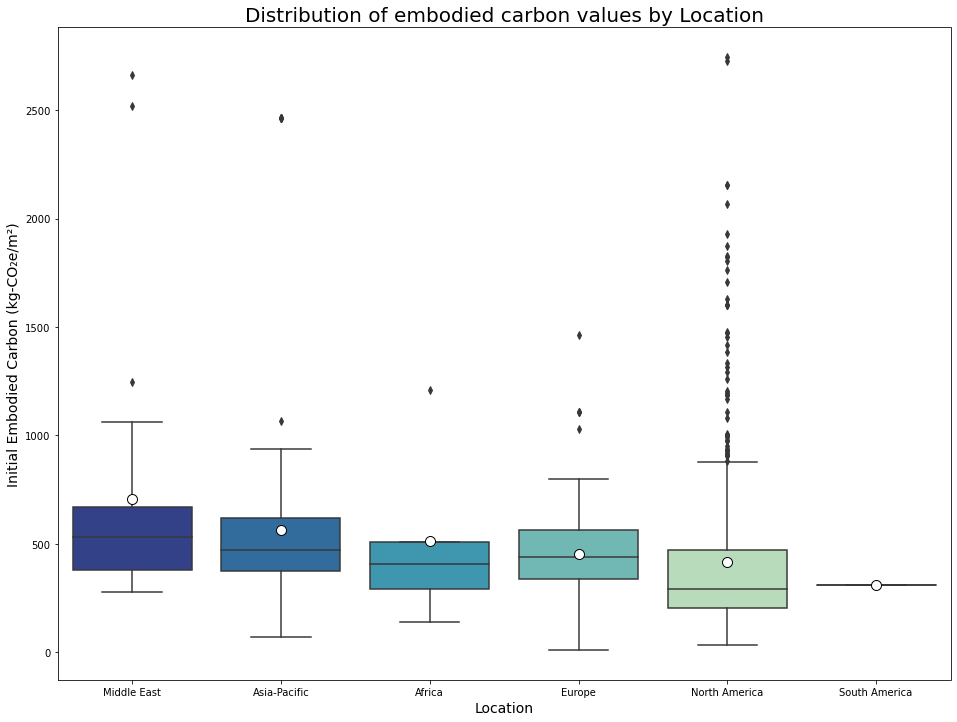

In [9]:
fig, ax = plt.subplots(figsize=(16,12))

sns.boxplot(x = df_BLDG_LOC_REGION['BLDG_LOC_REGION'], y = df_BLDG_LOC_REGION['EC_LCAA_PERM2'], palette='YlGnBu_r', order=mean.index,
            showmeans=True, meanprops={"marker":"o", "markerfacecolor":"white", "markeredgecolor":"black", "markersize":"10"})

plt.title("Distribution of embodied carbon values by Location", fontsize=20)
plt.xlabel("Location", fontsize = 14)
plt.ylabel("Initial Embodied Carbon (kg-CO₂e/m²)", fontsize = 14)

In [10]:
df_BLDG_AREA_M2 = df.copy()
df_BLDG_AREA_M2 = df.dropna(subset=['$BLDG_AREA_M2'])

mean = df_BLDG_US['EC_LCAA_PERM2'].groupby(df_BLDG_US['$BLDG_AREA_M2']).mean()
mean.index

Index(['18581 to 46451', '2324 to 4645', '46452 to 92903', '4646 to 9290',
       '466 to 929', '9291 to 18580', '93 or less', '930 to 2323', '94 to 465',
       'Over 92903'],
      dtype='object', name='$BLDG_AREA_M2')

Text(0, 0.5, 'Initial Embodied Carbon (kg-CO₂e/m²)')

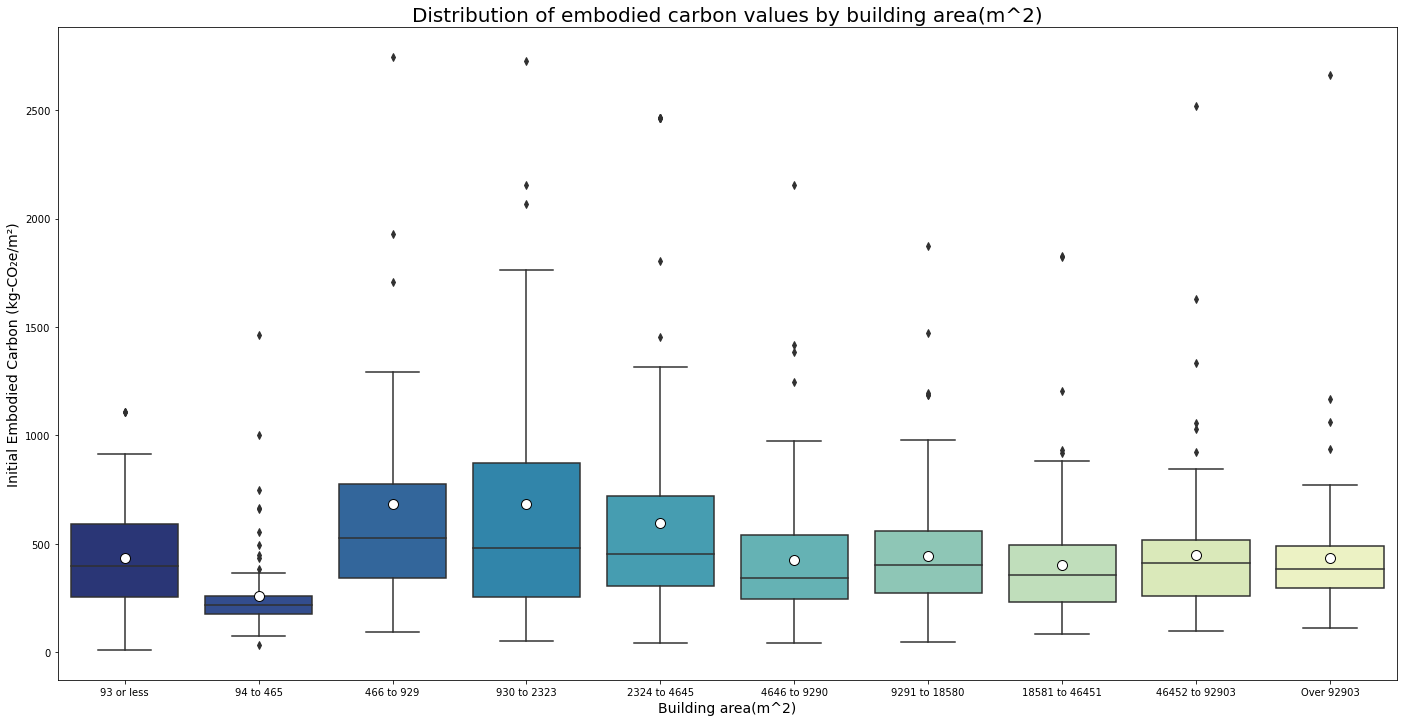

In [11]:
fig, ax = plt.subplots(figsize=(24,12))

sns.boxplot(x = df_BLDG_AREA_M2['$BLDG_AREA_M2'], y = df_BLDG_AREA_M2['EC_LCAA_PERM2'], palette='YlGnBu_r', 
            order=['93 or less','94 to 465','466 to 929','930 to 2323','2324 to 4645','4646 to 9290','9291 to 18580','18581 to 46451', '46452 to 92903', 'Over 92903'], 
            showmeans=True, meanprops={"marker":"o", "markerfacecolor":"white", "markeredgecolor":"black", "markersize":"10"})

plt.title("Distribution of embodied carbon values by building area(m^2)", fontsize=20)
plt.xlabel("Building area(m^2)", fontsize = 14)
plt.ylabel("Initial Embodied Carbon (kg-CO₂e/m²)", fontsize = 14)